## 2025-9-18 2年生 3科目模試の模擬試験

In [1]:
#大学
run_this = True
import os
# 変更したい作業ディレクトリのパス
new_path = r'C:\Users\rehay\Documents\メール一括送信'

# パスが存在するか確認してから変更
if os.path.exists(new_path):
    os.chdir(new_path)
    print("作業ディレクトリを変更しました:", os.getcwd())
else:
    print("指定したパスが存在しません")


作業ディレクトリを変更しました: C:\Users\rehay\Documents\メール一括送信


In [2]:
#自宅
run_this = True
import os
# 変更したい作業ディレクトリのパス
new_path = r'C:\Users\rehay\Documents\back up folder\担任用\2025年2年生\3科目模試の模擬試験'

# パスが存在するか確認してから変更
if os.path.exists(new_path):
    os.chdir(new_path)
    print("作業ディレクトリを変更しました:", os.getcwd())
else:
    print("指定したパスが存在しません")

作業ディレクトリを変更しました: C:\Users\rehay\Documents\back up folder\担任用\2025年2年生\3科目模試の模擬試験


In [ ]:
import pandas as pd

# Excelファイルの読み込み
df = pd.read_csv("result.csv")
print(df)

In [5]:
# 横に並べて表示（ベクトルのように）
cols = list(df.columns)
for i in range(0, len(cols), 5):
    print(" | ".join(cols[i:i+5]))

id | name | mail | test_1 | test_2
sum


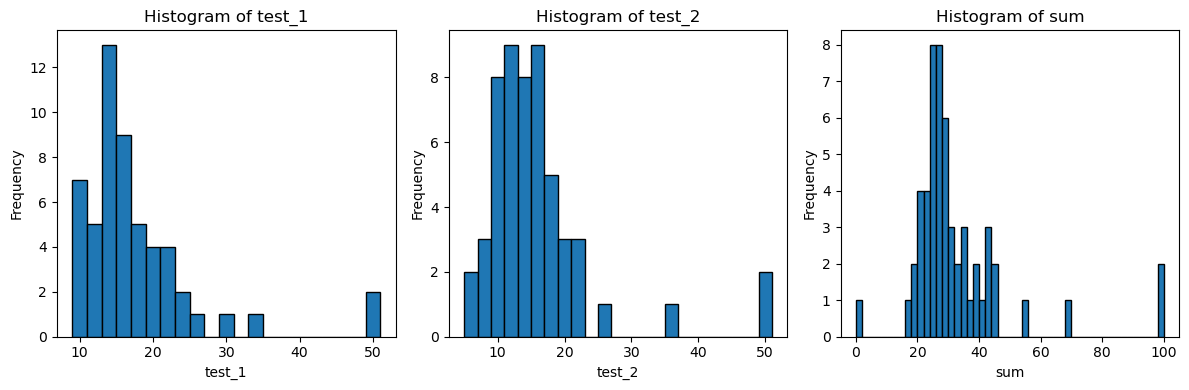

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = ['test_1', 'test_2', 'sum']

plt.figure(figsize=(12, 4))

for i, col in enumerate(columns_to_plot, 1):
    # 数値型に変換（エラーになる値はNaNに）
    numeric_data = pd.to_numeric(df[col], errors='coerce').dropna()

    # binの範囲を計算（2刻み）
    bin_min = int(numeric_data.min())
    bin_max = int(numeric_data.max()) + 2
    bins = range(bin_min, bin_max, 2)

    plt.subplot(1, 3, i)
    plt.hist(numeric_data, bins=bins, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

def stem_leaf_plot(data, col):
    print(f"\nStem-and-leaf plot for {col}")
    numeric_data = pd.to_numeric(data[col], errors='coerce').dropna().astype(int)
    stems = {}
    for num in numeric_data:
        stem, leaf = divmod(num, 10)
        stems.setdefault(stem, []).append(leaf)

    for stem in sorted(stems):
        leaves = ' '.join(str(leaf) for leaf in sorted(stems[stem]))
        print(f"{stem} | {leaves}")

# 対象の連続変数
columns_to_plot = ['test_1', 'test_2', 'sum']

for col in columns_to_plot:
    stem_leaf_plot(df, col)



Stem-and-leaf plot for test_1
0 | 9 9 9 9
1 | 0 0 0 1 1 2 2 2 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 6 6 6 6 6 7 7 7 8 8 9 9
2 | 0 0 1 1 1 2 4 4 6
3 | 0 4
5 | 0 0

Stem-and-leaf plot for test_2
0 | 5 6 7 7 8 9 9 9 9
1 | 0 0 0 0 1 2 2 2 2 2 2 2 2 3 3 3 3 3 4 4 4 5 5 5 5 5 5 5 6 6 7 7 8 8 8 9 9 9
2 | 1 2 2 5
3 | 5
5 | 0 0

Stem-and-leaf plot for sum
0 | 0
1 | 6 8 9
2 | 0 0 1 1 3 3 3 3 4 4 4 4 4 5 5 5 6 6 6 6 7 7 7 7 8 8 9 9 9 9
3 | 0 0 1 2 3 4 4 5 6 8 8
4 | 0 2 3 3 5 5
5 | 5
6 | 9
10 | 0 0


In [ ]:
import pandas as pd
import win32com.client as win32
# Outlookのアプリケーションを起動
outlook = win32.Dispatch('outlook.application')

# 各行に対してメールを送信
for index, row in df.iterrows():
    name = row['name']
    email = row['mail']
    test_1 = row['test_1']
    test_2 = row['test_2']
    total = row['sum']

    # メールの作成
    mail = outlook.CreateItem(0)
    mail.To = email
    mail.Subject = "3科目模試（予備試験）の結果"
    mail.Body = (
        f"{name}さん\n\n"
        f"9月18日実施\n3科目模試（予備試験）の結果をお知らせします\n"
        f"前半: {test_1} /50点\n"
        f"後半: {test_2} /50点\n"
        f"合計: {total} /100点\n\n"
        "クラスの得点分布はTeamsをご確認ください\n"
        "お疲れさまでした\n\n"
        "---\n"
        "九州看護福祉大学\n"
        "吉田 勇一"
    )

    # メール送信（下書きに保存したい場合は mail.Save() に変更）
    #
    # 
    # 
    #mail.Send()
